## 1) Problem Statement
- This project tries to predict how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course

## 2) Data Collection 
- Data Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

In [1]:
DATA_PATH = '../notebook/data/study.csv'

### 2.1 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
df_raw = pd.read_csv(DATA_PATH)
df_raw

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### 2.2 Dataset information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3) Data Checks 
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Check Missing values

In [4]:
df_raw.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### 3.2 Check Duplicates

In [5]:
df_raw.duplicated().sum()

0

In [6]:
df_raw[df_raw.duplicated()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


#### 3.3 Check data type

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 check the number of unique values of each column

In [8]:
df_raw.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
for col in df_raw.columns:
    print(f'{col}: {df_raw[col].unique()}')
    print("---" * 30)

gender: ['female' 'male']
------------------------------------------------------------------------------------------
race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
------------------------------------------------------------------------------------------
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
------------------------------------------------------------------------------------------
lunch: ['standard' 'free/reduced']
------------------------------------------------------------------------------------------
test_preparation_course: ['none' 'completed']
------------------------------------------------------------------------------------------
math_score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87


#### 3.5 Check statistics of data set

In [10]:
df_raw.describe().round(2)

,math_score,reading_score,writing_score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


##### Insight
- All means are close to each other [66 - 68]
- All STDs are close to each other [14.60 - 15.20]
- mins are different [math=>0 ; writing=>10 ; reading=>17 ]

#### 3.6 Check various numeric/categories present in the different numeric/categorical column

In [11]:
numerical_features = [feature for feature in df_raw.columns if df_raw[feature].dtype != 'O']
categorical_features = [feature for feature in df_raw.columns if df_raw[feature].dtype == 'O']

print('We have {0} numerical features: {1}'.format(len(numerical_features), numerical_features))
print('We have {0} categorical features: {1}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.7 Computing Total Score / Average Score

In [12]:
df_raw['total_score'] = df_raw['math_score'] + df_raw['reading_score'] + df_raw['writing_score']
df_raw['average'] = df_raw['total_score'] / 3
df_raw.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
math_full_mark = df_raw[df_raw['math_score'] == 100].shape[0]
reading_full_mark = df_raw[df_raw['reading_score'] == 100].shape[0]
writing_full_mark = df_raw[df_raw['writing_score'] == 100].shape[0]

math_less_20_mark = df_raw[df_raw['math_score'] <= 20].shape[0]
reading_less_20_mark = df_raw[df_raw['reading_score'] <= 20].shape[0]
writing_less_20_mark = df_raw[df_raw['writing_score'] <= 20].shape[0]

print(f'Number of students with full marks in Maths: {math_full_mark}')
print(f'Number of students with full marks in Writing: {writing_full_mark}')
print(f'Number of students with full marks in Reading: {reading_full_mark}')

print(f'Number of students with less than 20 marks in Maths: {math_less_20_mark}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20_mark}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20_mark}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17
Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


## 4) Exploring Data (Visualization)

#### 4.1 Visualize average score distribution

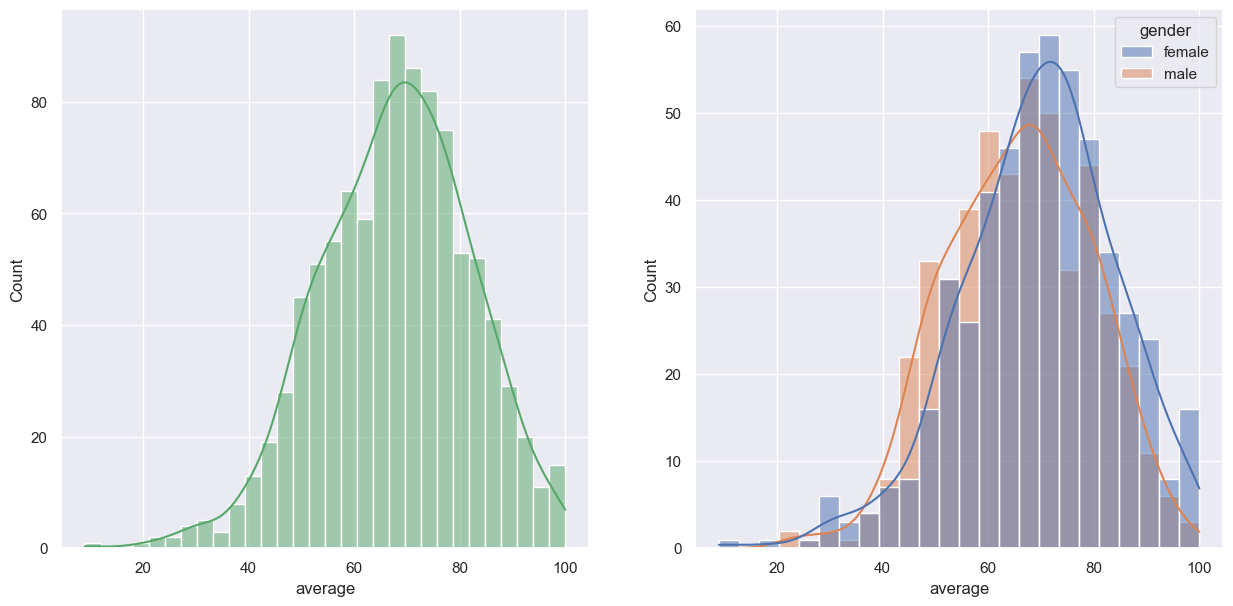

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_raw,x='average',bins=30,kde=True,color='g')

plt.subplot(122)
sns.histplot(data=df_raw,x='average',kde=True,hue='gender')
plt.show()

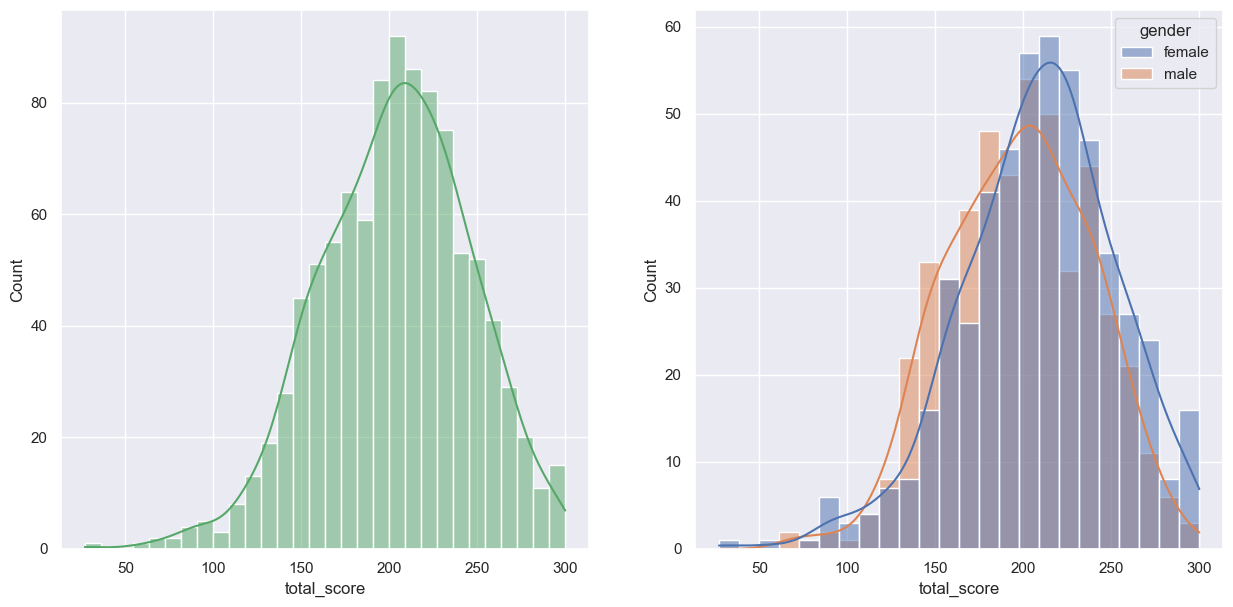

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_raw,x='total_score',bins=30,kde=True,color='g')

plt.subplot(122)
sns.histplot(data=df_raw,x='total_score',kde=True,hue='gender')
plt.show()

##### Insight
- Female students tend to perform well then male students.

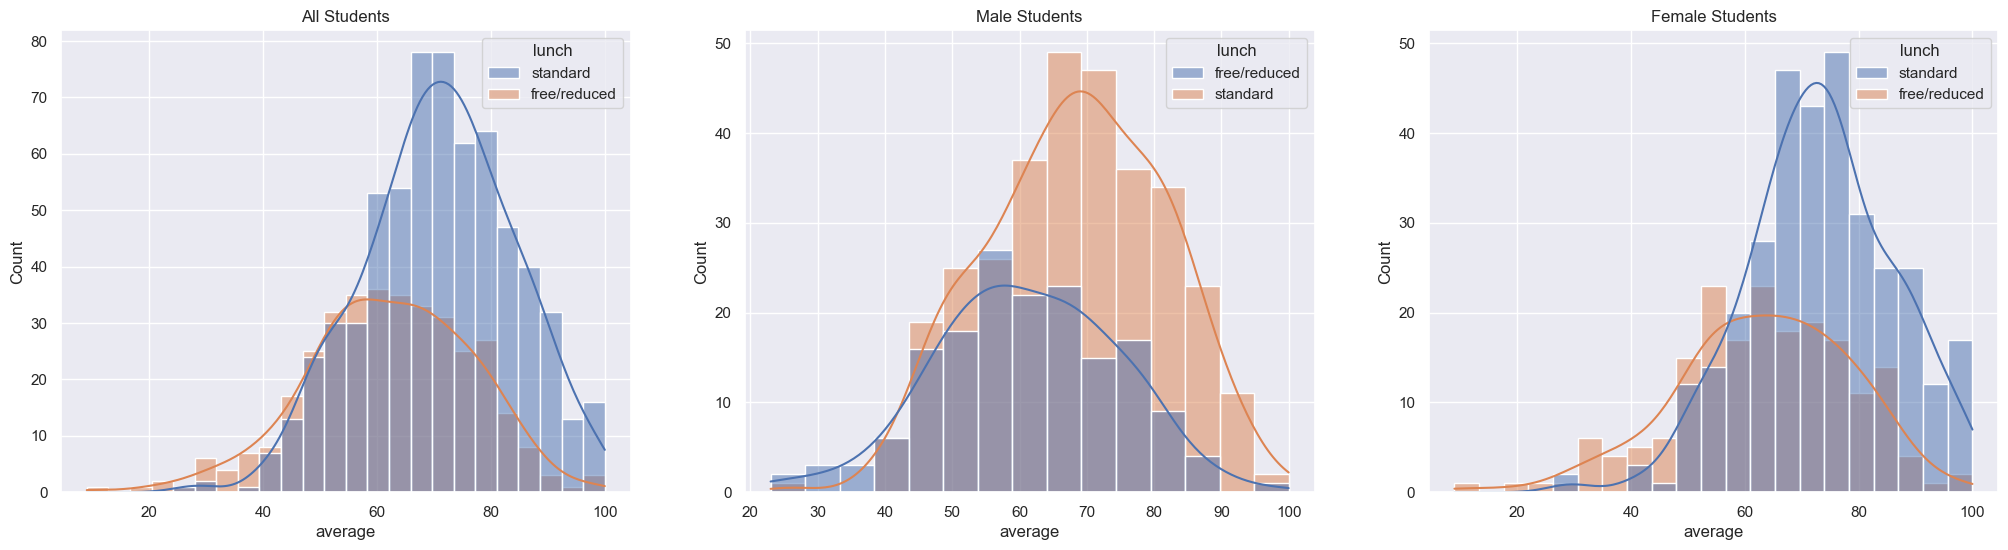

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df_raw, x='average', kde=True, hue='lunch', ax=axs[0])
axs[0].set_title('All Students')


sns.histplot(data=df_raw[df_raw.gender=='male'], x='average', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title('Male Students')

sns.histplot(data=df_raw[df_raw.gender=='female'], x='average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title('Female Students')

plt.show()

##### Insight
- Standard Lunch helps perform well in exams for males and females

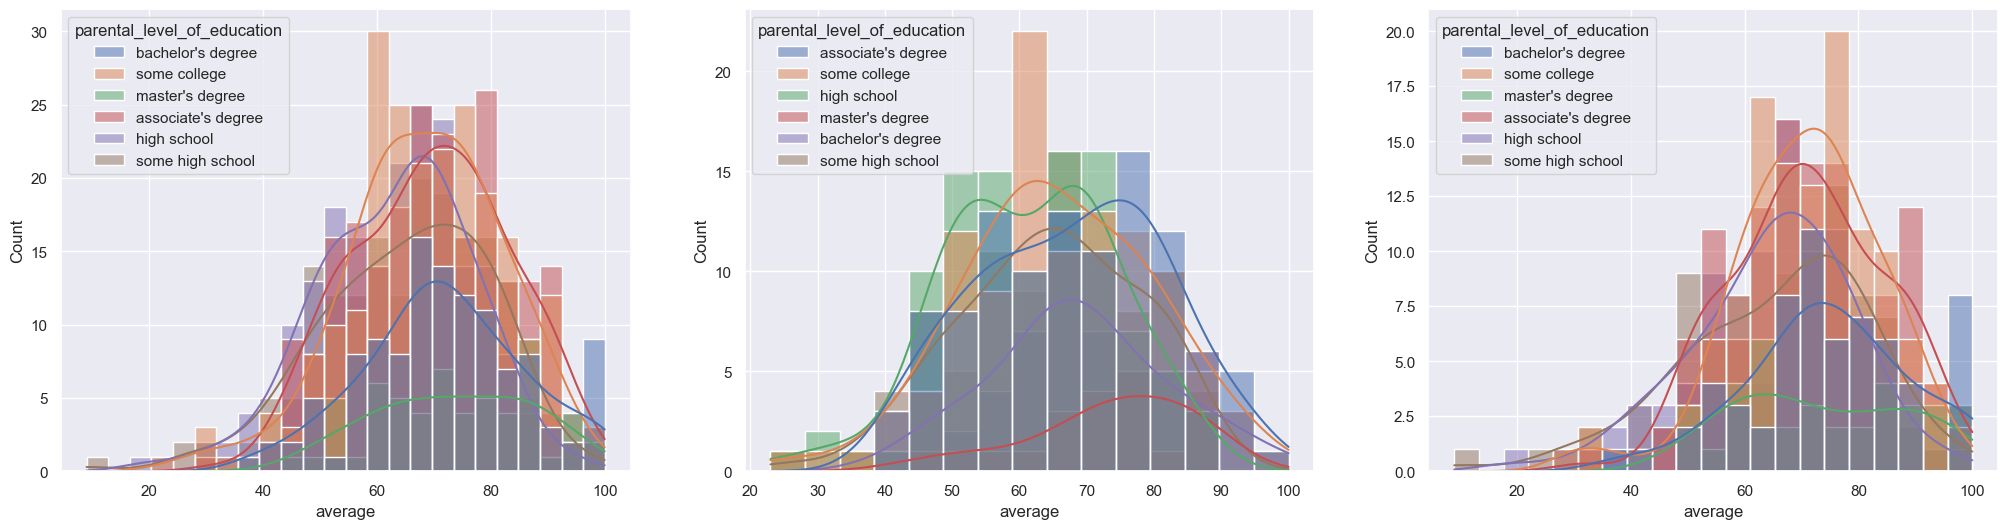

In [17]:
figure, axes = plt.subplots(1,3,figsize=(25,6))

sns.histplot(data=df_raw,x='average', kde=True, hue='parental_level_of_education', ax=axes[0])
axs[0].set_title('All Students')

sns.histplot(data=df_raw[df_raw.gender=='male'], x='average', kde=True, hue='parental_level_of_education', ax=axes[1])
axs[1].set_title('male Students')

sns.histplot(data=df_raw[df_raw.gender=='female'], x='average', kde=True, hue='parental_level_of_education', ax=axes[2])
axs[2].set_title('female Students')

plt.show()

##### Insight
- In general parent's education don't improve student performance in exams.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

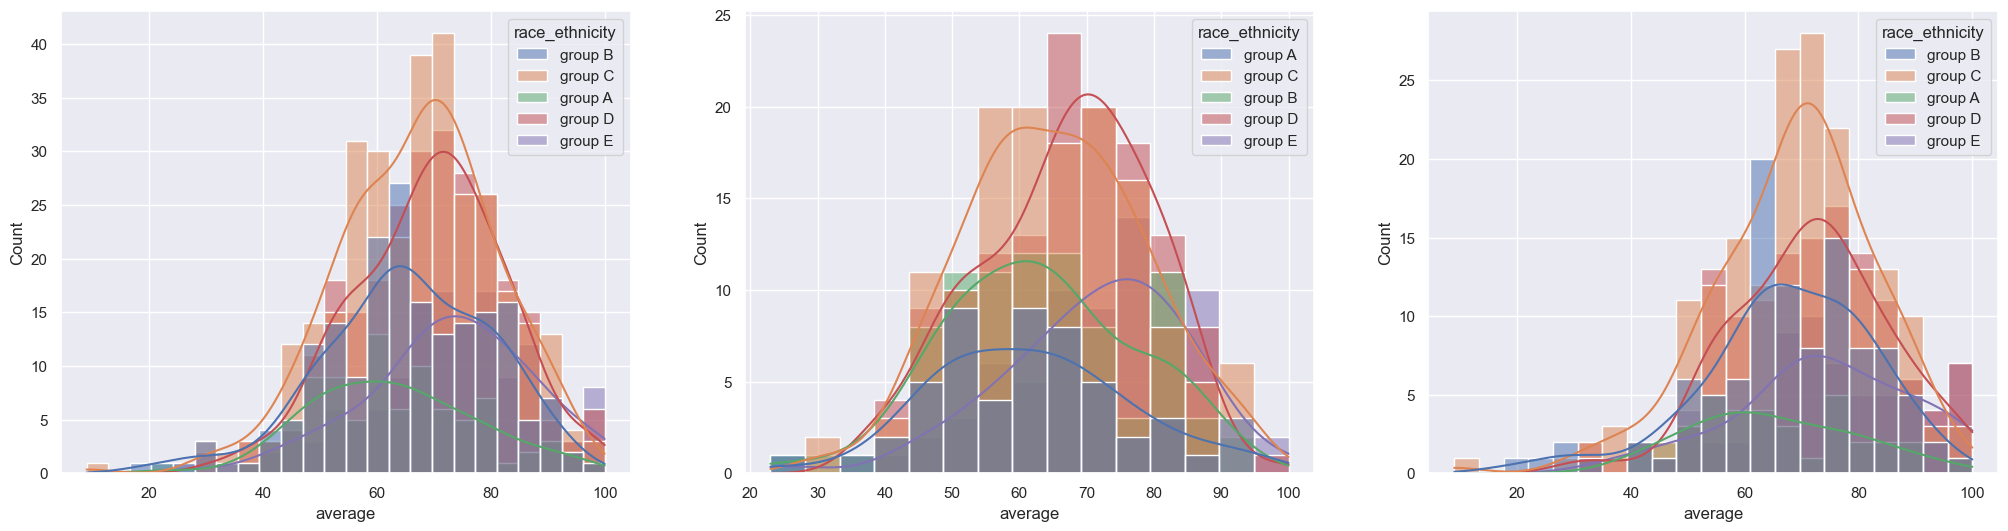

In [18]:
figure, axes = plt.subplots(1,3,figsize=(25,6))

sns.histplot(data=df_raw,x='average', kde=True, hue='race_ethnicity', ax=axes[0])
axs[0].set_title('All Students')

sns.histplot(data=df_raw[df_raw.gender=='male'], x='average', kde=True, hue='race_ethnicity', ax=axes[1])
axs[1].set_title('male Students')

sns.histplot(data=df_raw[df_raw.gender=='female'], x='average', kde=True, hue='race_ethnicity', ax=axes[2])
axs[2].set_title('female Students')

plt.show()

##### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

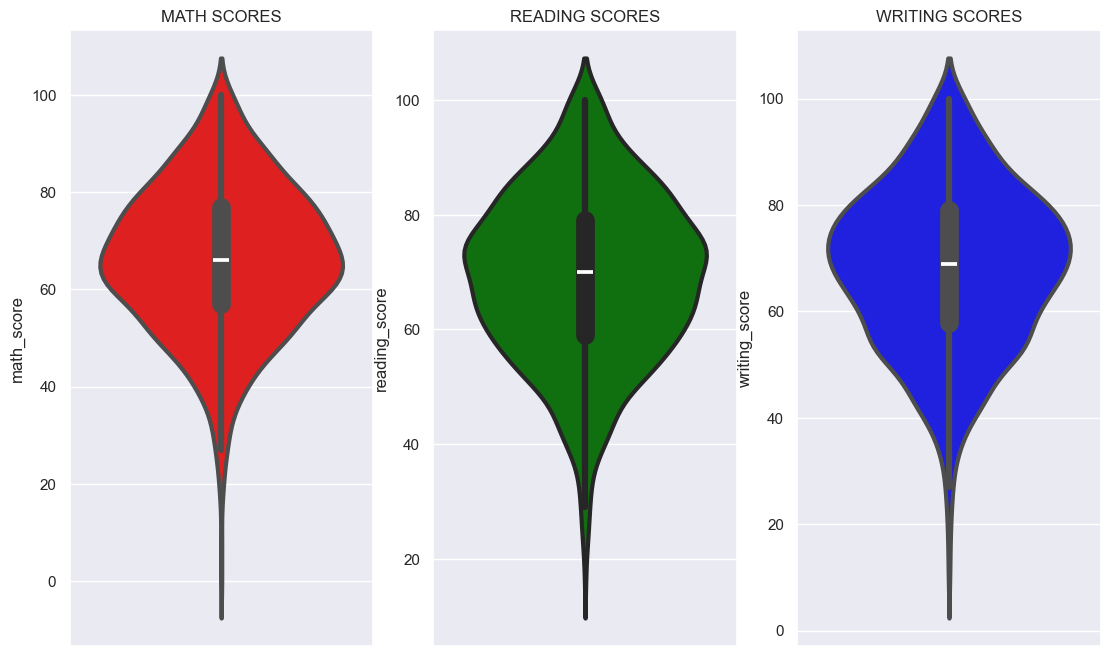

In [19]:
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df_raw,color='red',linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df_raw,color='green',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df_raw,color='blue',linewidth=3)
plt.show()

##### Insights
- From the above three plots its clearly visible that most of the students score in between 55-75 in Maths whereas in reading and writing most of them score from 60-80

#### 4.3 Multivariate analysis using pieplot

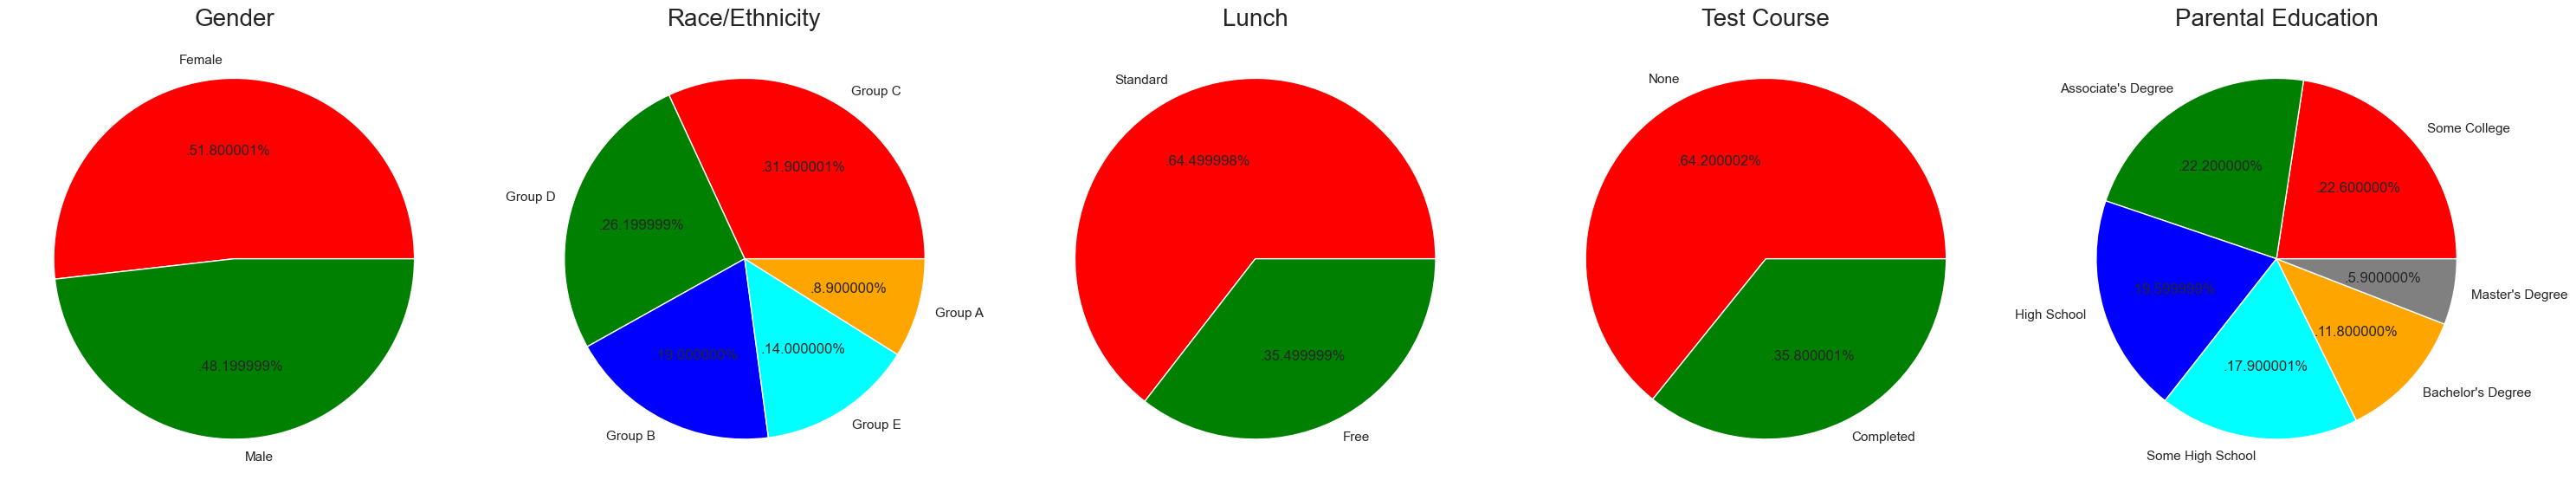

In [20]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df_raw['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df_raw['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df_raw['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df_raw['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df_raw['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

##### Insights
- Number of Male and Female students is almost equal
- Number of students is greatest in Group C
- Number of students who have standard lunch is greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization

#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_12636\2922679607.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_raw['gender'], data=df_raw, palette ='bright', ax=ax[0], saturation=0.95)


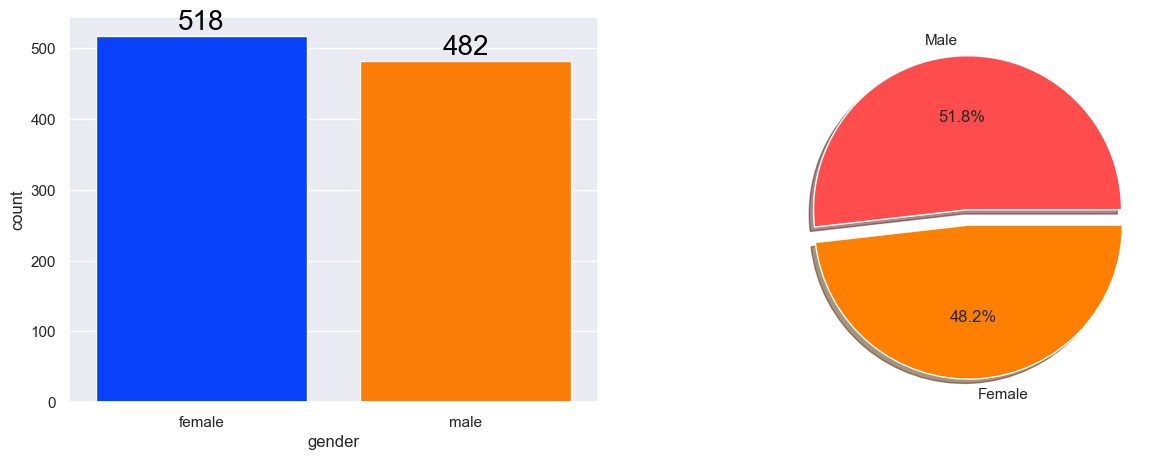

In [21]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

sns.countplot(x=df_raw['gender'], data=df_raw, palette ='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df_raw['gender'].value_counts(), labels=['Male','Female'], explode=[0,0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d','#ff8000'])
plt.show()

##### Insights
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [24]:
gender_group = df_raw.groupby(['gender']).mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_12636\2344496894.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_12636\2344496894.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_scores = [gender_group['average'][1], gender_group['math_score'][1]]


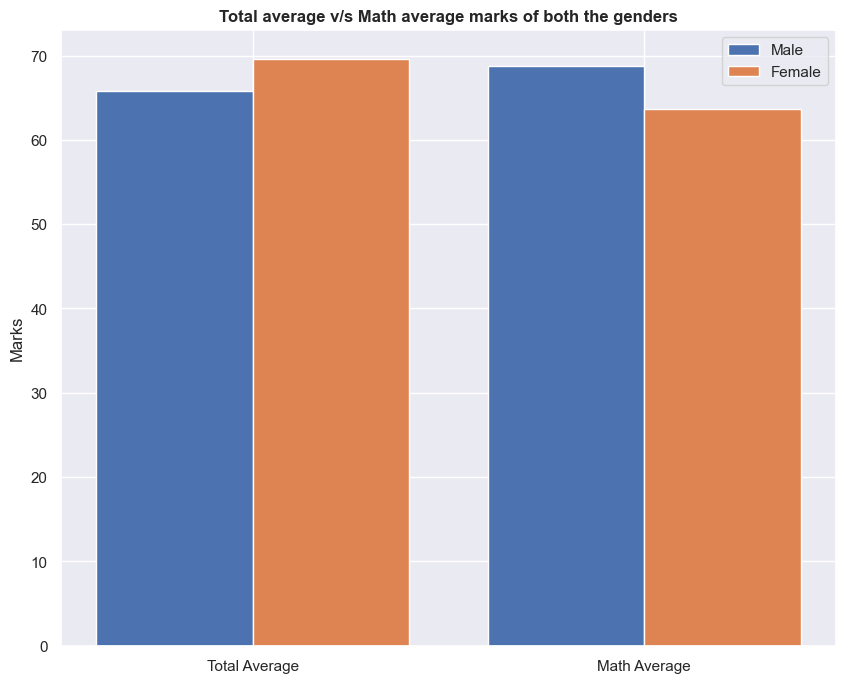

In [26]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

##### Insights
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN

C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_12636\2794826202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_raw['race_ethnicity'],data=df_raw,palette = 'bright',ax=ax[0],saturation=0.95)


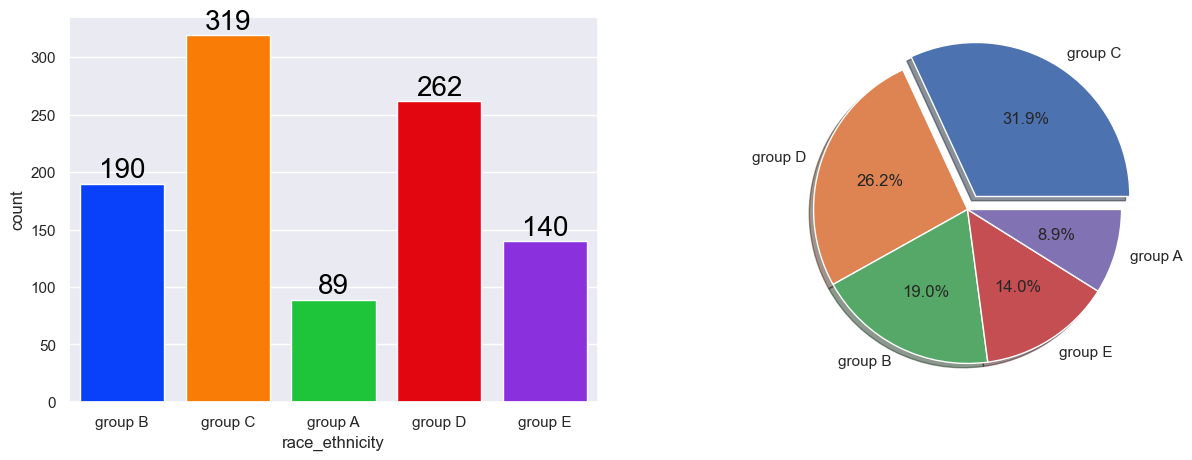

In [29]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df_raw['race_ethnicity'],data=df_raw,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df_raw['race_ethnicity'].value_counts(),labels=df_raw['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

##### Insights
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_12636\3419923009.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_12636\3419923009.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_12636\3419923009.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for

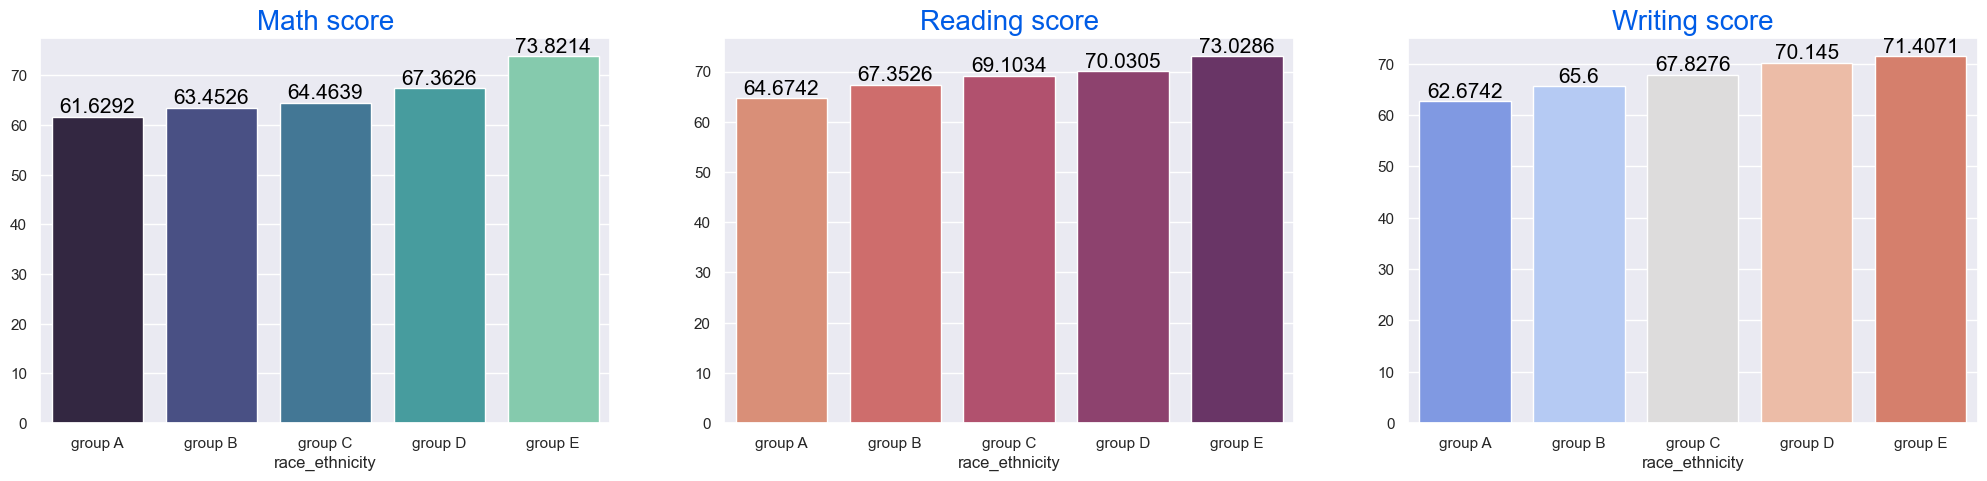

In [34]:
Group_data2=df_raw.groupby('race_ethnicity')

f,ax=plt.subplots(1,3,figsize=(25,5))

sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

##### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Social economic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_12636\1340617691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_raw['parental_level_of_education'], palette = 'Blues')


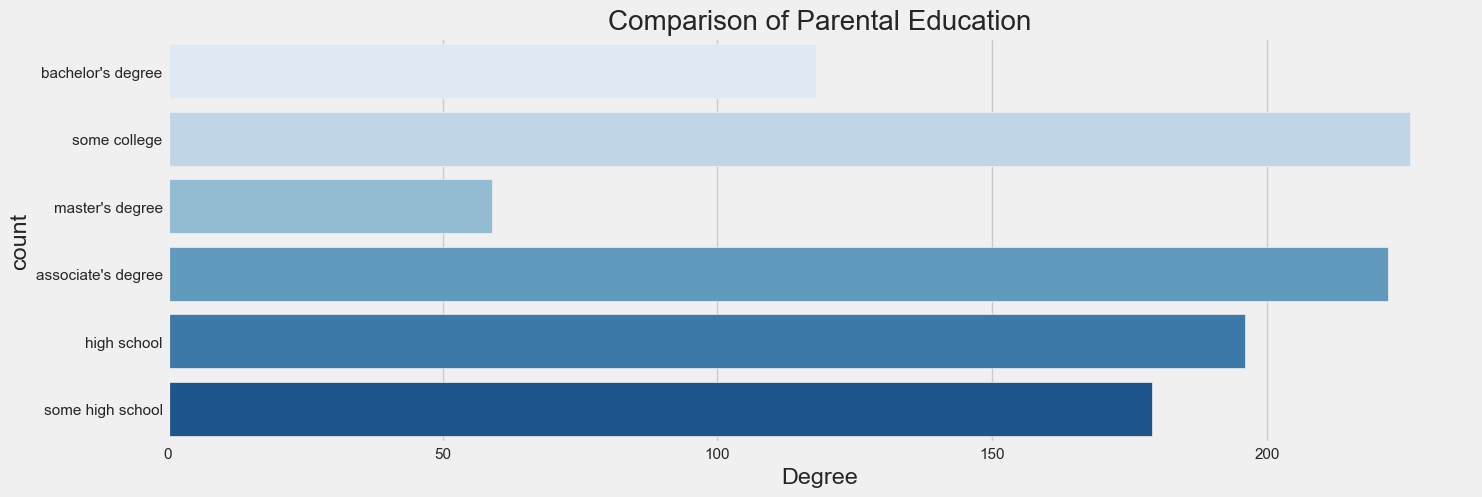

In [36]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')
sns.countplot(df_raw['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

##### Insights
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

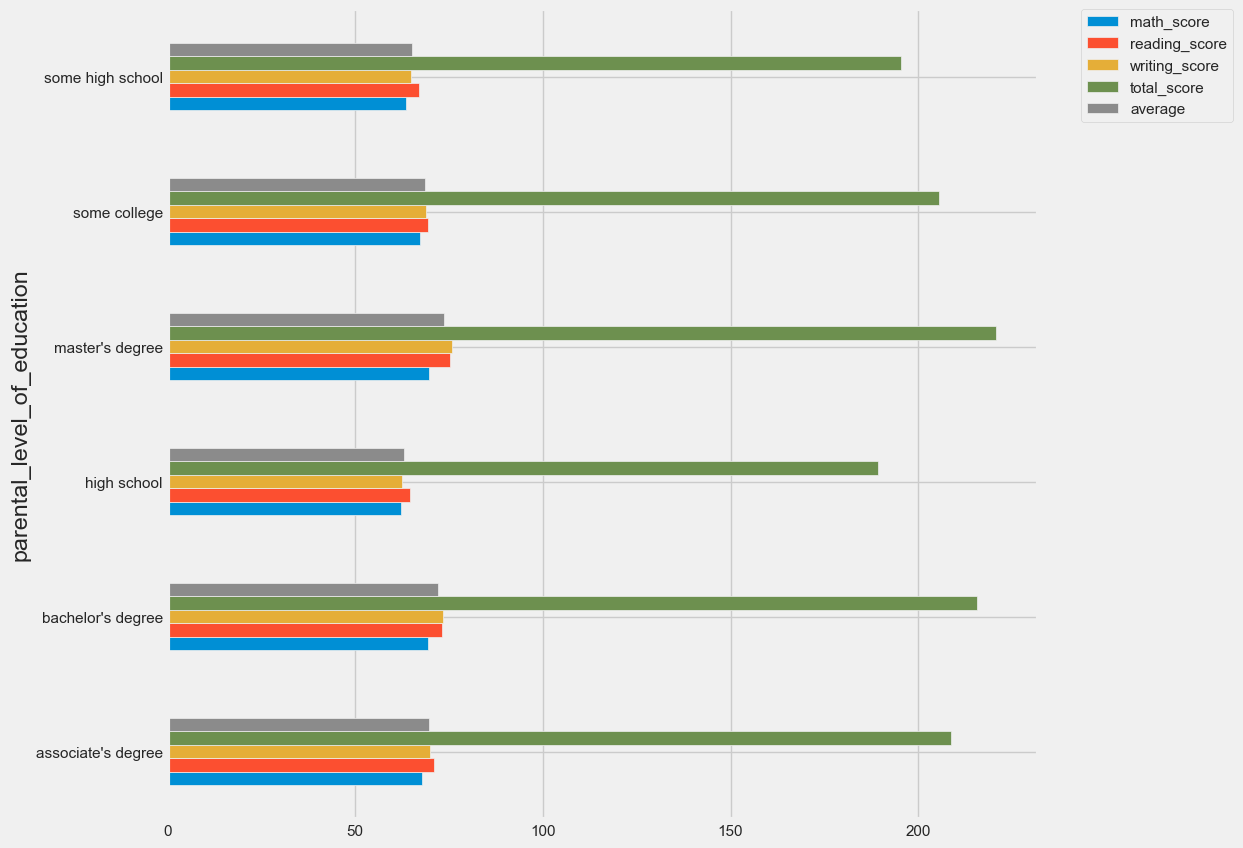

In [38]:
df_raw.groupby('parental_level_of_education').agg('mean', numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### Insights
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_12636\3309675402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_raw['lunch'], palette = 'PuBu')


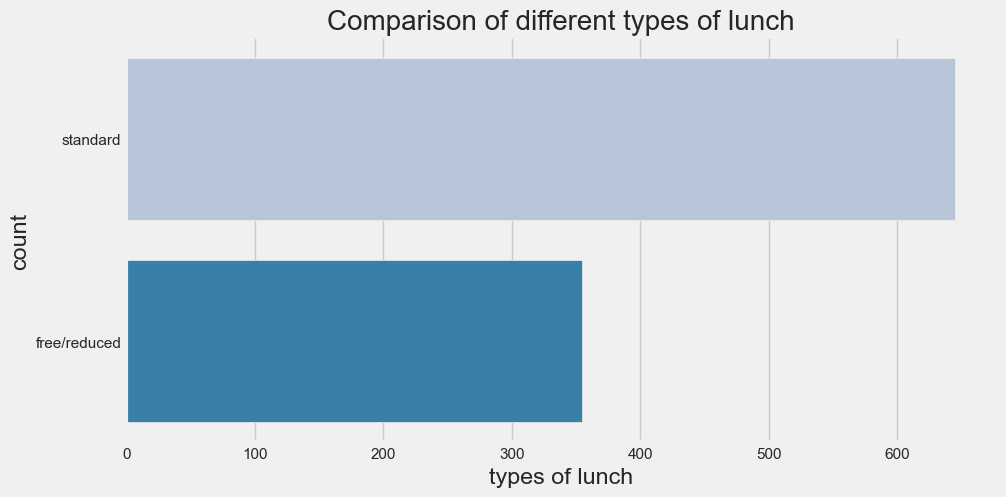

In [41]:
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(df_raw['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

##### Insights
- Students who have been served by Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

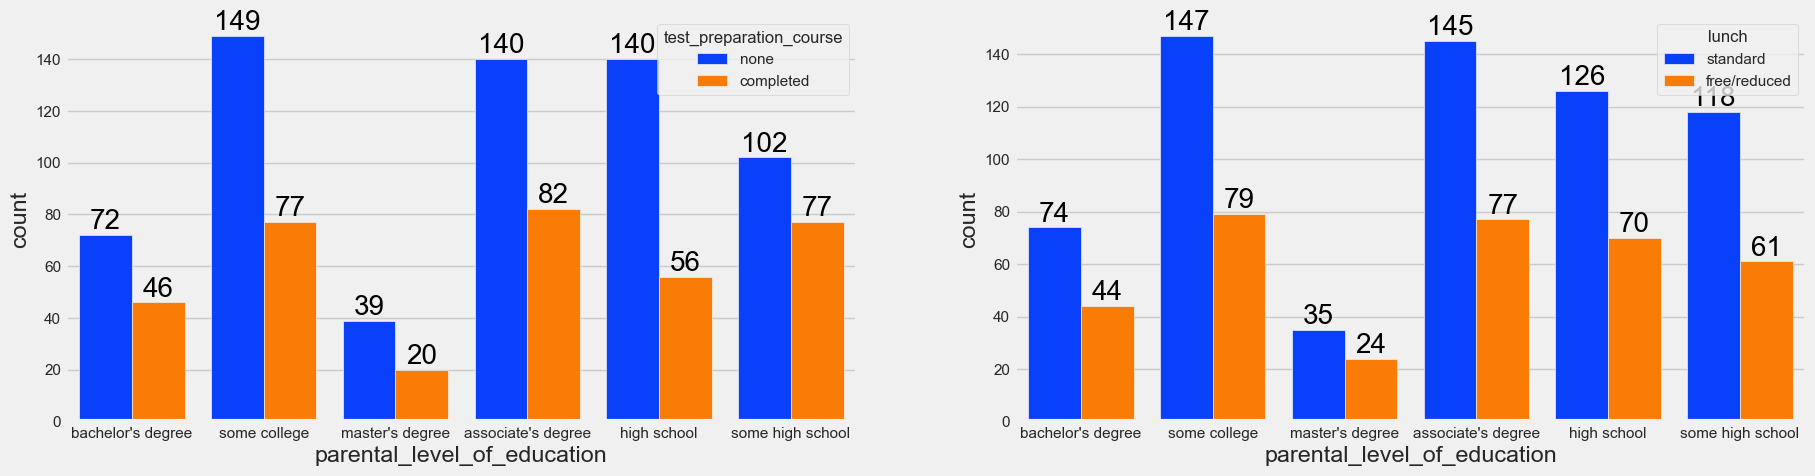

In [46]:
f,ax=plt.subplots(1,2,figsize=(20,5))

sns.countplot(x=df_raw['parental_level_of_education'],data=df_raw,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df_raw['parental_level_of_education'],data=df_raw,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

##### Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

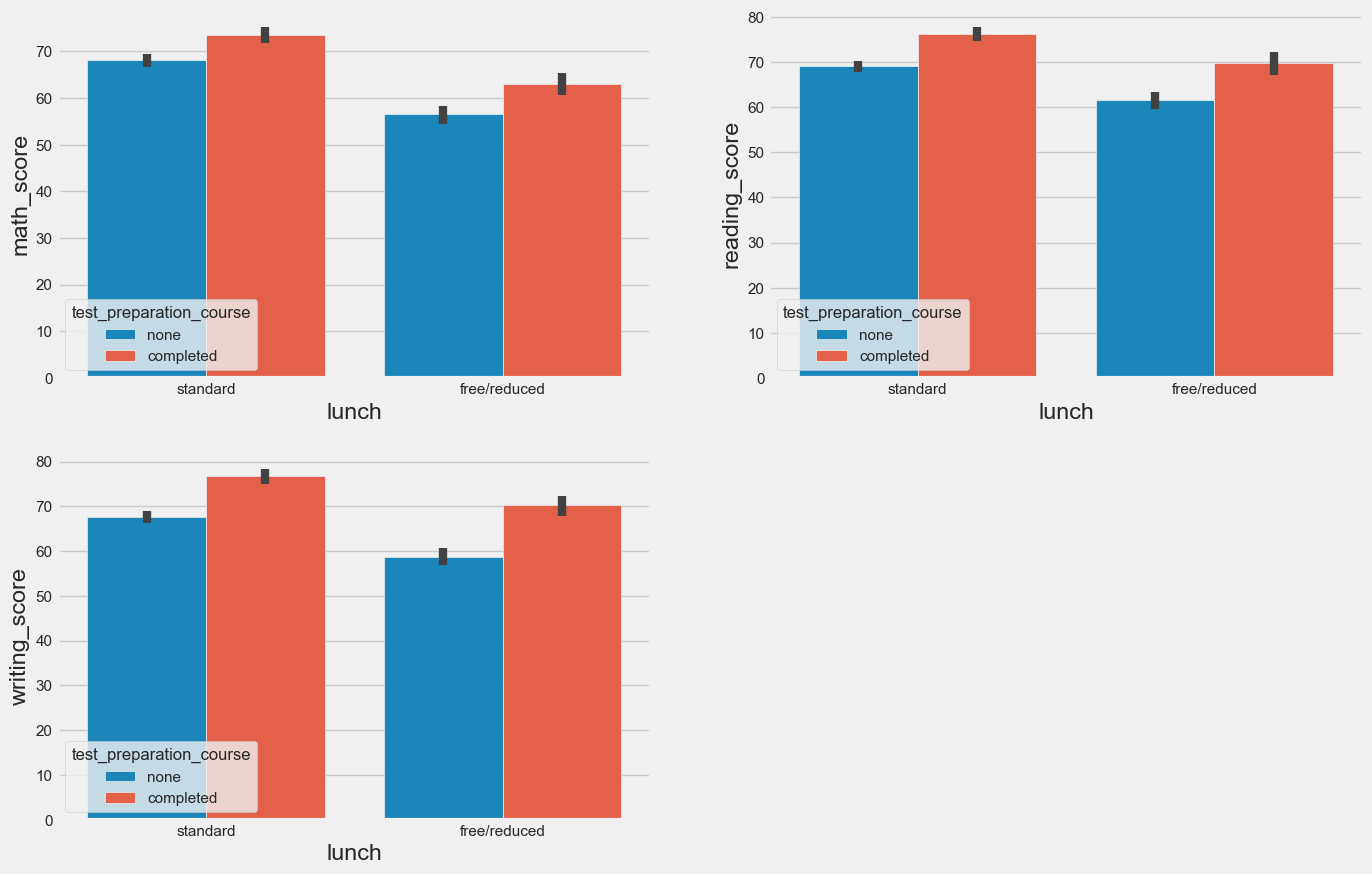

In [49]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot (x=df_raw['lunch'], y=df_raw['math_score'], hue=df_raw['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df_raw['lunch'], y=df_raw['reading_score'], hue=df_raw['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df_raw['lunch'], y=df_raw['writing_score'], hue=df_raw['test_preparation_course'])

##### Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

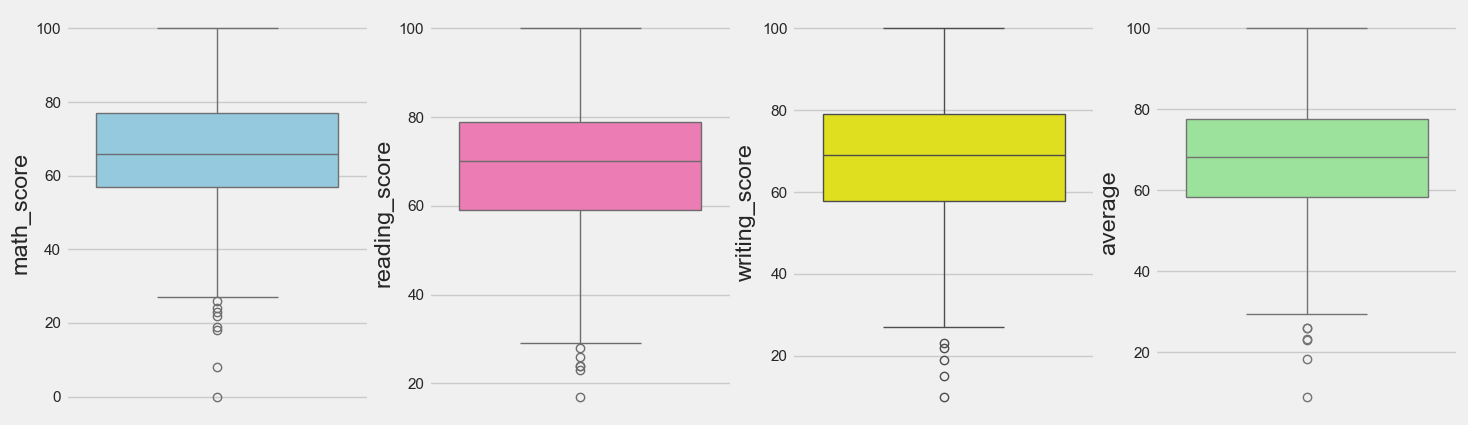

In [50]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df_raw['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df_raw['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df_raw['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df_raw['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

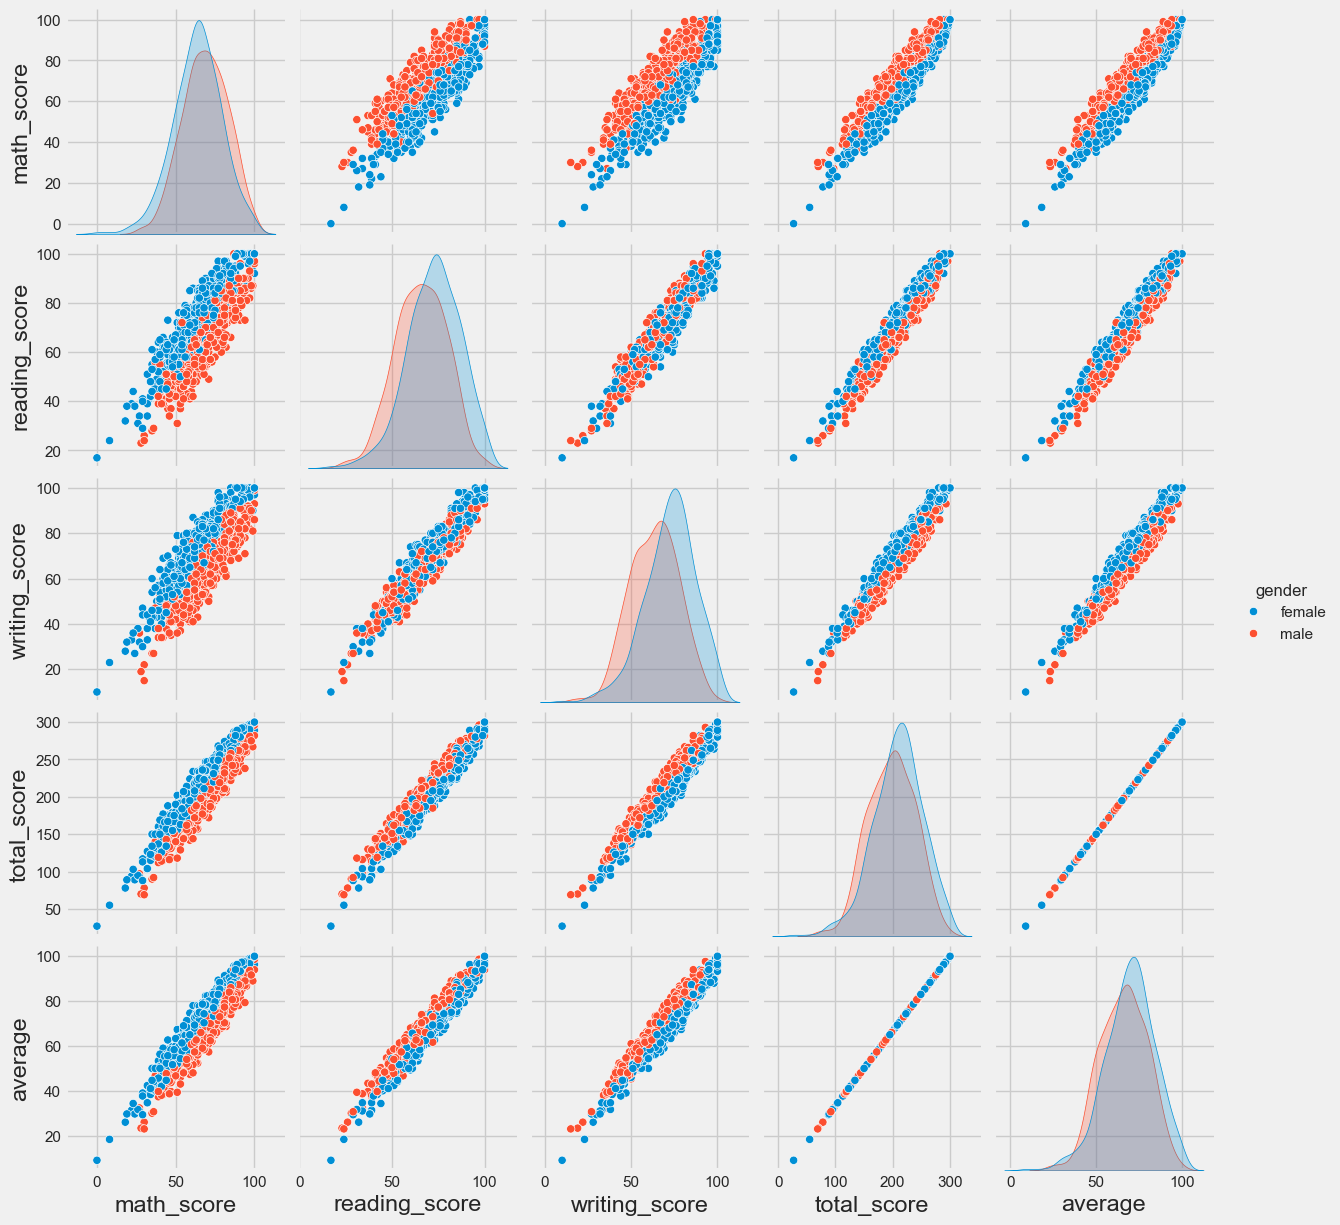

In [51]:
sns.pairplot(df_raw, hue = 'gender')
plt.show()

##### Insights
- all the scores increase linearly with each other.

## 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

-----

---